In [309]:
import numpy as np
import pandas as pd
import math

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


from imblearn.over_sampling import RandomOverSampler
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns # visualization

plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

In [313]:
train_data = pd.read_csv("C:/python and machine learning/hyperthyroid_train_final.csv",index_col=False,)
test_data = pd.read_csv("C:/Users/hp/Downloads/hyperthyroid_test.csv",index_col=False,)
data = pd.concat([train_data, test_data]).reset_index(drop=True)
data

,patient_id,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,class
0,3733,41.0,F,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative
1,1442,23.0,F,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,other,negative
2,2965,46.0,M,f,f,f,f,f,f,f,...,f,NaN,t,109.0,t,0.91,t,120.0,other,negative
3,806,70.0,F,t,f,f,f,f,f,f,...,t,1.9,t,175.0,f,NaN,f,NaN,other,negative
4,2807,70.0,F,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,2924,30.0,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,negative
3768,974,68.0,F,f,f,f,f,f,f,f,...,t,2.1,t,124.0,t,1.08,t,114.0,SVI,negative
3769,1493,74.0,F,f,f,f,f,f,f,f,...,t,1.8,t,112.0,t,1.07,t,105.0,other,negative
3770,252,72.0,M,f,f,f,f,f,f,f,...,t,2.0,t,82.0,t,0.94,t,87.0,SVI,negative


## Data Cleaning

In [315]:
print(train_data.shape)
print(test_data.shape)
n_train = train_data.shape[0]
n_test = test_data.shape[0]
train_index = data.index[0:n_train]
test_index = data.index[n_train:(n_train + n_test)]

(2800, 29)
(972, 29)


In [317]:
print(data)
data.drop('patient_id', axis=1, inplace=True)
data.drop('referral_source', axis=1, inplace=True)
data.head(2)
print(max(data['age']))

      patient_id   age sex on_thyroxine query_on_thyroxine  \
0           3733  41.0   F            f                  f   
1           1442  23.0   F            f                  f   
2           2965  46.0   M            f                  f   
3            806  70.0   F            t                  f   
4           2807  70.0   F            f                  f   
...          ...   ...  ..          ...                ...   
3767        2924  30.0   F            f                  f   
3768         974  68.0   F            f                  f   
3769        1493  74.0   F            f                  f   
3770         252  72.0   M            f                  f   
3771        2008  64.0   F            f                  f   

     on_antithyroid_medication sick pregnant thyroid_surgery I131_treatment  \
0                            f    f        f               f              f   
1                            f    f        f               f              f   
2                 

In [319]:
data.info()
# from here we can see that 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

## Data Visualization

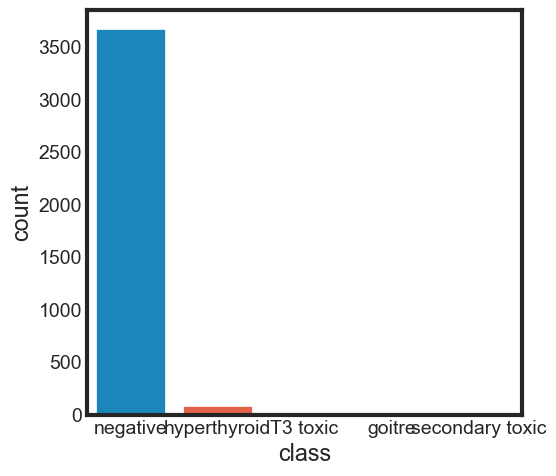

In [322]:
plt.figure(figsize=(5, 5))
sns.countplot(x='class', data=data)
plt.show()

In [324]:
print(data.isnull())
# From here we can see that there are a few missing values in various coloumns which need to be dealt with.

        age    sex  on_thyroxine  query_on_thyroxine  \
0     False  False         False               False   
1     False  False         False               False   
2     False  False         False               False   
3     False  False         False               False   
4     False  False         False               False   
...     ...    ...           ...                 ...   
3767  False  False         False               False   
3768  False  False         False               False   
3769  False  False         False               False   
3770  False  False         False               False   
3771  False  False         False               False   

      on_antithyroid_medication   sick  pregnant  thyroid_surgery  \
0                         False  False     False            False   
1                         False  False     False            False   
2                         False  False     False            False   
3                         False  False     False   

In [326]:
# Imputation of missing values 
# Separate columns into numeric and categorical
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].astype(str)

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

if not numeric_cols.empty:
    print("Imputing numeric columns:", list(numeric_cols))
    numeric_imputer = SimpleImputer(strategy='mean')
    data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])
else:
    print("No numeric columns to impute.")

if not categorical_cols.empty:
    print("Imputing categorical columns:", list(categorical_cols))
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])
else:
    print("No categorical columns to impute.")

Imputing numeric columns: ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
Imputing categorical columns: ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'class']


In [328]:
# Now we can perform more accurate visualization on the dataset.

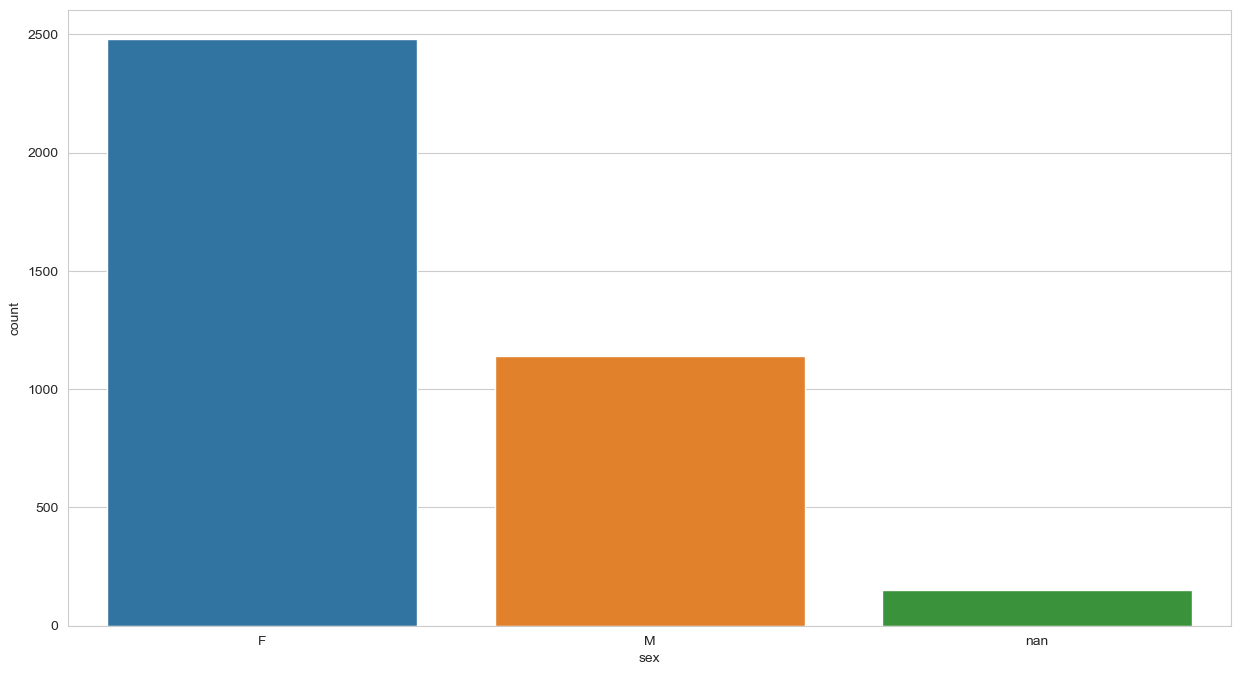

In [129]:
sns.countplot (x='sex',data=data)
plt.show()


94.0


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


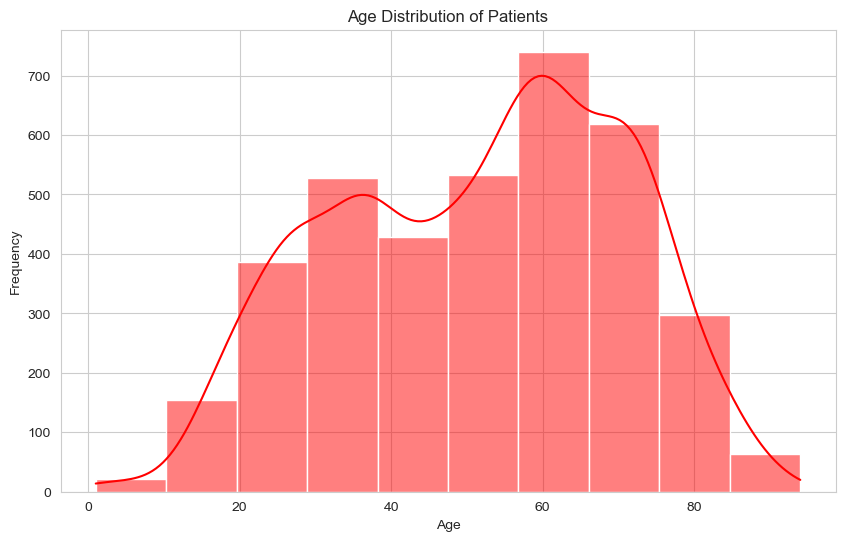

In [130]:
# visualizing target variable with respect to age 

# set background style of the plot 
sns.set_style('whitegrid')

print(max(data['age']))
#plotting histogram for age 
plt.figure(figsize=(10,6))
sns.histplot(data['age'] , kde=True , color='red' , bins=10)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Visualizing via histogram 

In [144]:
data_id_diag = data.loc[:, [ "class"]]
data_diag = data.loc[:, ["class"]]
data_mean = data.iloc[:, 1:11]
data_se = data.iloc[:, 11:22]
data_worst = data.iloc[:, 23:]

print("data_diag:\n", data_diag.head())
print("data_mean:\n", data_mean.head())
print("data_se:\n", data_se.head())
print("data_worst:\n", data_worst.head())

data_diag:
       class
0  negative
1  negative
2  negative
3  negative
4  negative
data_mean:
   sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick pregnant  \
0   F            f                  f                         f    f        f   
1   F            f                  f                         f    f        f   
2   M            f                  f                         f    f        f   
3   F            t                  f                         f    f        f   
4   F            f                  f                         f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid query_hyperthyroid  
0               f              f                 f                  f  
1               f              f                 f                  f  
2               f              f                 f                  f  
3               f              f                 f                  f  
4               f              f                 f       

C:\Users\hp\AppData\Local\Temp\ipykernel_19684\1602773000.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data[column]))
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\AppData\Local\Temp\ipykernel_19684\1602773000.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibilit

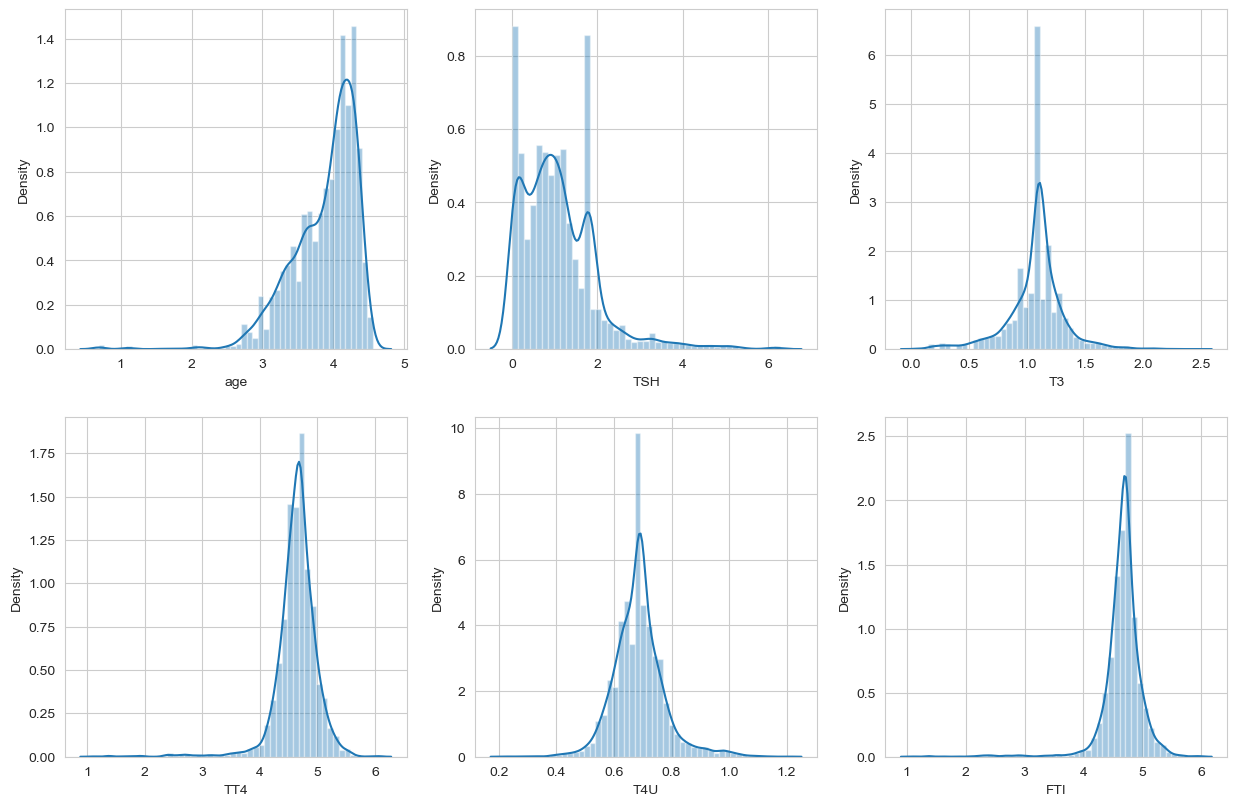

In [152]:
import pandas as pd        # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['age','TSH','T3','TT4','T4U','FTI']


plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in columns:
    data[column]+=1
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(np.log(data[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()


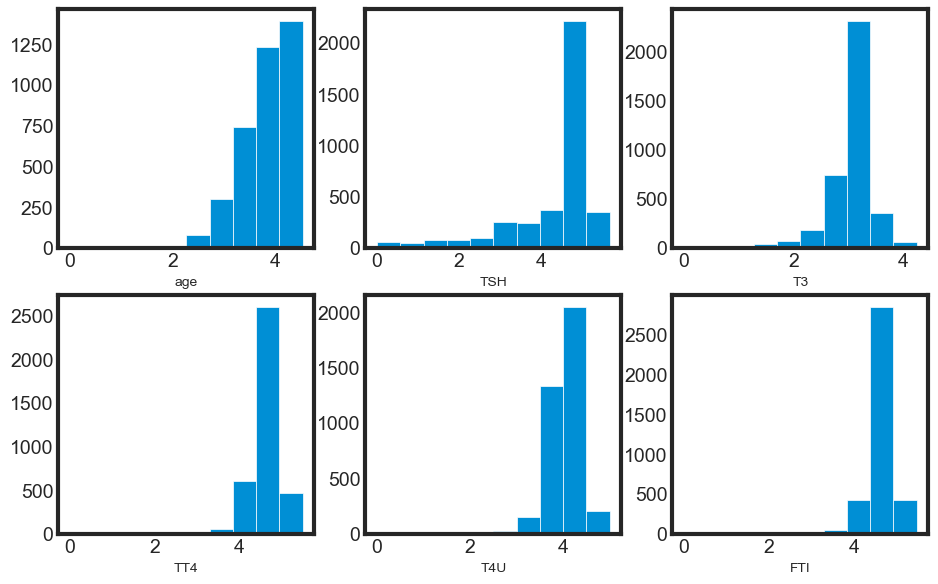

In [343]:
import pandas as pd        # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['age','TSH','T3','TT4','T4U','FTI']


plt.figure(figsize=(10,10),facecolor='white')
plotnumber = 1

for column in columns:
    data[column]+=1
    ax = plt.subplot(3,3,plotnumber)
    plt.hist(np.log(data[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()


### 1. Age Histogram:
Distribution: The age distribution is right-skewed, meaning that the majority of the data is concentrated towards the higher age ranges.
Peak: The highest frequency is observed in the 4th bin, indicating that most of the subjects in the dataset belong to this age group.
Implication: This suggests that the dataset might have more older individuals or that the study population is primarily composed of older adults.
### 2. TSH Histogram:
Distribution: The TSH (Thyroid-Stimulating Hormone) levels are also right-skewed, with most of the values concentrated in the higher range (around 4).
Peak: There is a sharp peak in the last bin, indicating that many subjects have high TSH levels.
Implication: High TSH levels may indicate hypothyroidism or a similar thyroid condition in a significant portion of the dataset.
### 3. T3 Histogram:
Distribution: The T3 (Triiodothyronine) levels are similarly right-skewed, with most values concentrated towards the higher range.
Peak: The highest frequency is again in the last bin, suggesting that many individuals have elevated T3 levels.
Implication: High T3 levels could indicate hyperthyroidism or another condition affecting thyroid function.
### 4.TT4 Histogram:
Distribution:
The TT4 values are predominantly clustered between 3 and 5, with a clear right-skewed distribution, meaning there are fewer low values and more high values.
Peak:
The peak (mode) of the TT4 distribution is at 4, indicating that this value occurs most frequently in the dataset.
Implications:
Normal Range Indicator: The peak around 4 suggests that this might be the normal or expected range for TT4 in the population being studied.
Clinical Relevance: In a medical context, especially if TT4 is a measure of thyroid function, this peak could be used to assess what is considered a normal level. Deviations from this value could indicate potential health issues.
Population Health Insight: The concentration of data around this peak implies that most of the population has a similar thyroid function level, with few outliers.
### 5.T4U Histogram:
Distribution:
The T4U values are also concentrated between 3 and 5, with a similar right-skewed distribution as seen in TT4.
Peak:
The T4U distribution also peaks at 4, similar to TT4.
Implications:
Correlation with TT4: The alignment of this peak with TT4 suggests that these two metrics may be correlated or measure related physiological functions.
Expected Value: This peak indicates that a T4U value of 4 is likely considered normal or typical in this population.
Clinical Benchmark: The peak can be used as a reference point in diagnosing thyroid conditions. Values outside this peak might signal abnormal thyroid activity.
### 6.FTI Histogram:
Distribution:
The FTI values are concentrated around 4, with a similar right-skewed pattern as TT4 and T4U.
Peak:
The FTI histogram peaks at 4, in line with the other two variables.
Implications:
Derived Measurement: Since FTI is often calculated using TT4 and T4U, the peak at 4 indicates that when these two variables are within their normal ranges, FTI also tends to fall within this range.
Thyroid Function Insight: An FTI peak around 4 suggests normal thyroid function in the population studied, reinforcing the idea that this is a healthy range.
Diagnostic Value: This peak serves as a useful reference for healthcare providers. Values deviating from this peak may indicate conditions such as hypothyroidism or hyperthyroidism.

### Overall conclusion:
The overall patterns observed suggest that this dataset primarily represents an older population with generally stable thyroid function. However, the presence of skewness and a bimodal distribution in some variables indicates that there may be subgroups within the population that exhibit different thyroid function patterns. These insights could be crucial for understanding how thyroid function varies across different age groups or in different health conditions within this population.



## Correlation Analysis using HeatMap

In [330]:
# Encoding data to include categorical features as well while encoding
enc=LabelEncoder()
for x in data.columns:
    data[x]=enc.fit_transform(data[x])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        3772 non-null   int64
 1   sex                        3772 non-null   int32
 2   on_thyroxine               3772 non-null   int32
 3   query_on_thyroxine         3772 non-null   int32
 4   on_antithyroid_medication  3772 non-null   int32
 5   sick                       3772 non-null   int32
 6   pregnant                   3772 non-null   int32
 7   thyroid_surgery            3772 non-null   int32
 8   I131_treatment             3772 non-null   int32
 9   query_hypothyroid          3772 non-null   int32
 10  query_hyperthyroid         3772 non-null   int32
 11  lithium                    3772 non-null   int32
 12  goitre                     3772 non-null   int32
 13  tumor                      3772 non-null   int32
 14  hypopituitary           

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

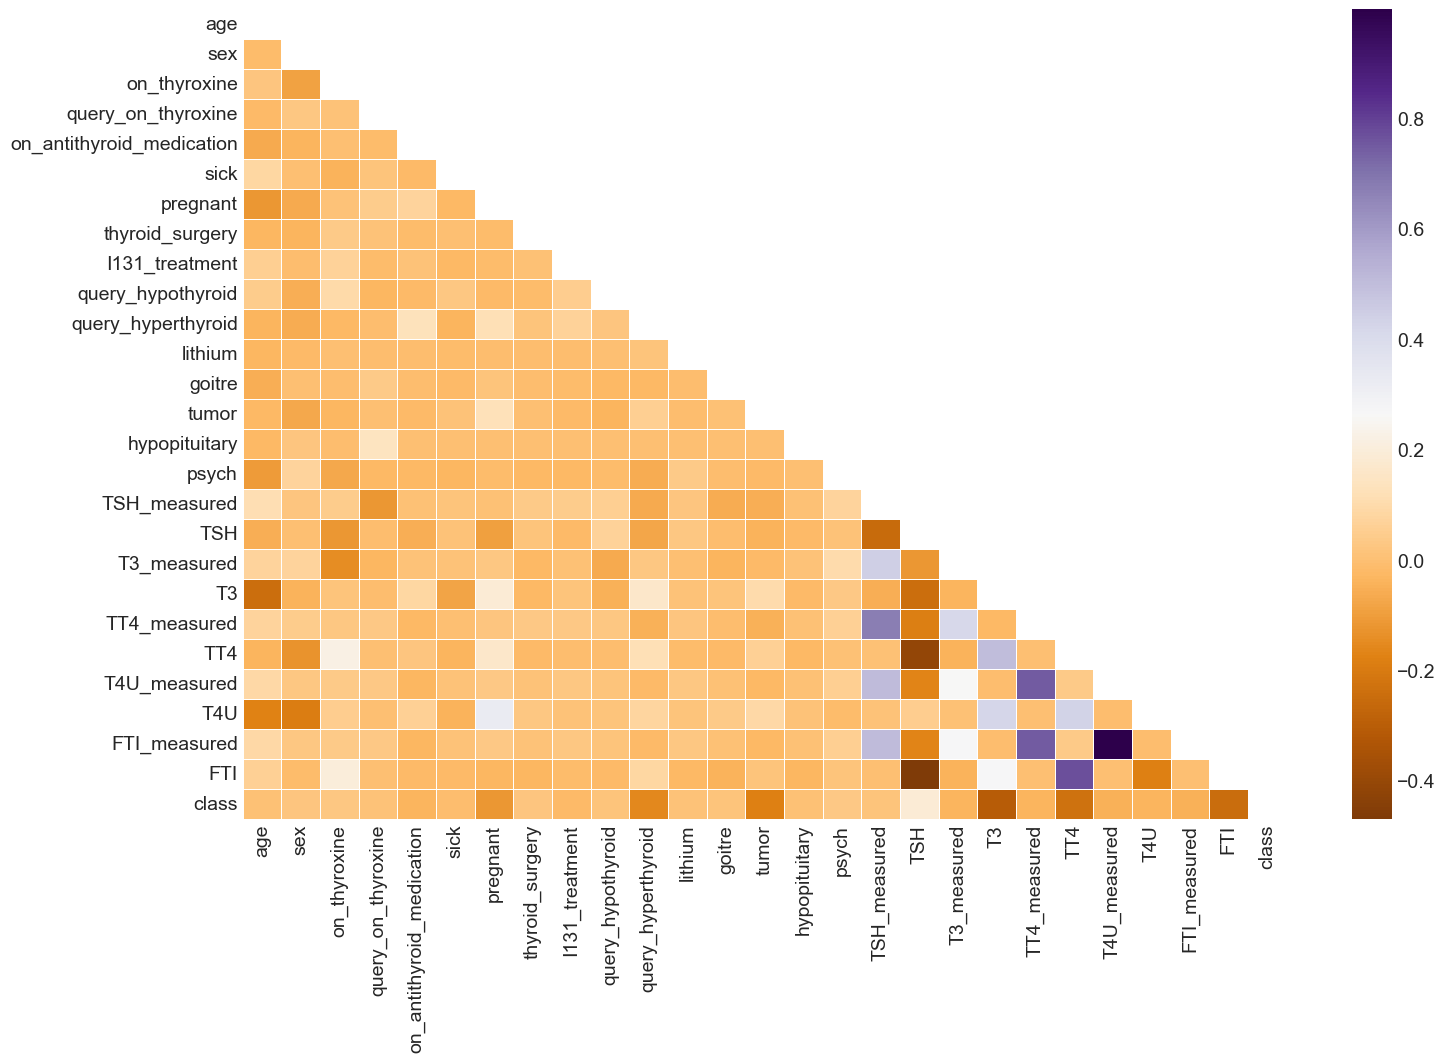

In [341]:
# correlation analysis using heatmap
plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(data.corr(),mask= mask, annot=True, fmt='.2f', linewidths=0.5, cmap='PuOr')

### Positive Correlations:

There are some strong positive correlations (darker brown) among certain variables. For example:
TT4_measured and FTI_measured show a strong positive correlation, indicating that as one increases, the other also tends to increase.
Similarly, T3_measured is positively correlated with other thyroid-related measures, such as TT4_measured.

### Negative Correlations:

The heatmap also shows some negative correlations (lighter purple). For instance:
There is a noticeable negative correlation between T3_measured and T4U_measured, suggesting that as one increases, the other decreases.
Low or No Correlations:

Many pairs of variables have a low correlation (light colors close to white), indicating little to no linear relationship between them.
For example, age appears to have a low correlation with most of the other variables.
Clinical Implications:

Strong correlations among the thyroid-related measurements (T3_measured, TT4_measured, FTI_measured, etc.) suggest that these variables are interrelated, which is expected since they all measure aspects of thyroid function.
The negative correlations might point to inverse relationships that could be clinically significant, such as compensatory mechanisms in thyroid hormone regulation.

## Exploratory Data Analysis 

In [172]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,class
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,49.177890,0.382291,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,103.323171,0.796129,21.471368,0.938759,104.445652,0.897402,57.520679,0.897932,103.664899,2.965005
std,19.385164,0.561927,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,57.108231,0.402927,7.686821,0.239803,33.110111,0.303473,18.777977,0.302778,29.626690,0.237875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,65.000000,1.000000,18.000000,1.000000,85.000000,1.000000,46.000000,1.000000,87.000000,3.000000
50%,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,113.000000,1.000000,22.000000,1.000000,102.000000,1.000000,58.000000,1.000000,103.000000,3.000000
75%,65.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,135.000000,1.000000,24.000000,1.000000,120.000000,1.000000,66.000000,1.000000,115.250000,3.000000
max,92.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,287.000000,1.000000,69.000000,1.000000,241.000000,1.000000,146.000000,1.000000,234.000000,4.000000


## Data Preprocessing

In [175]:
list1 = data.columns[:-1]  # List of feature column names
print("Feature columns:", list1)

# Separate features (X) and target variable (y)
X = data[list1]  # Features
y = data.iloc[:, -1]  # Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Feature columns: Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI'],
      dtype='object')


### Balancing Dataset to Remove Bias

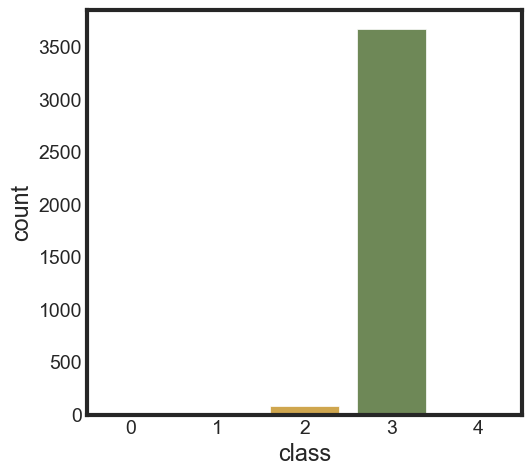

In [178]:
plt.figure(figsize=(5, 5))
sns.countplot (x='class',data=data)
plt.show()

####  Here we can see that the dataset is highly imbalanced.

In [180]:
x = data.drop(['class'],axis=1)
y = data['class']

In [182]:
#For balancing the imbalance dataset
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
rdsample=RandomOverSampler()

rdsample = RandomOverSampler()
x_sampled,y_sampled  = rdsample.fit_resample(x,y)

In [184]:
#Checking for shape of x_sample
x_sampled.shape

(18350, 26)

In [186]:
#creating dataframe of x_sample
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)
x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,38,0,0,0,0,0,0,0,0,0,...,1,110,1,27,1,122,1,73,1,102
1,20,0,0,0,0,0,0,0,0,0,...,1,138,1,21,1,98,0,58,0,104
2,43,1,0,0,0,0,0,0,0,0,...,1,103,0,22,1,106,1,48,1,114
3,68,0,1,0,0,0,0,0,0,0,...,1,21,1,20,1,172,0,58,0,104
4,68,0,0,0,0,0,0,0,0,0,...,1,77,1,12,1,57,1,44,1,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18345,31,0,0,0,1,0,0,0,0,0,...,1,223,1,46,1,237,1,81,1,210
18346,31,0,0,0,1,0,0,0,0,0,...,1,223,1,46,1,237,1,81,1,210
18347,31,0,0,0,1,0,0,0,0,0,...,1,223,1,46,1,237,1,81,1,210
18348,31,0,0,0,1,0,0,0,0,0,...,1,223,1,46,1,237,1,81,1,210


<Axes: xlabel='class', ylabel='count'>

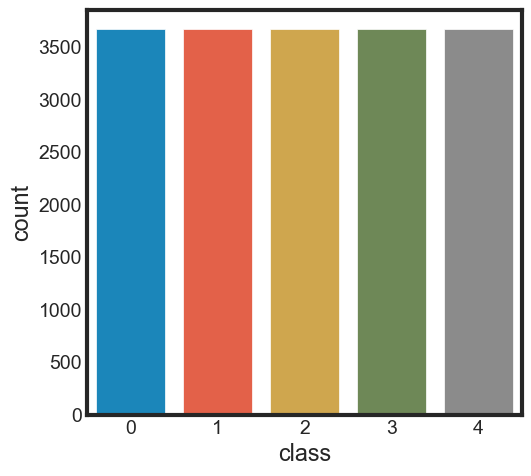

In [275]:
plt.figure(figsize=(5, 5))
sns.countplot(data=data, x= y_sampled)  

### Now we can see the dataset has been balanced.


In [279]:
unique_values_all_columns = {col: data[col].unique() for col in data.columns}
print("\nUnique values for all columns:")
for col, unique_values in unique_values_all_columns.items():
    print(f"{col}: {unique_values}")

# Get value counts for all columns
value_counts_all_columns = {col: data[col].value_counts() for col in data.columns}
print("\nValue counts for all columns:")
for col, counts in value_counts_all_columns.items():
    print(f"{col}:\n{counts}\n")


Unique values for all columns:
age: [38 20 43 68 15 57 78 64 66 82 65 69 25 63 39 61 48 79 52 53 58 22 71 31
 76 34 83 23 56 62 41 45 59 32 81 18 85 51 75 24 67 72 35 74 42 33 19 40
 70 80 28 36 46 60 55  0 47 27 26 73 16  5 77 14 21 12 29 44 13 50 30 10
  7 87 54 17 88 37 86 11 84 92  9  2  8  6  3  1 89  4 49 91 90]
sex: [0 1 2]
on_thyroxine: [0 1]
query_on_thyroxine: [0 1]
on_antithyroid_medication: [0 1]
sick: [0 1]
pregnant: [0 1]
thyroid_surgery: [0 1]
I131_treatment: [0 1]
query_hypothyroid: [0 1]
query_hyperthyroid: [0 1]
lithium: [0 1]
goitre: [0 1]
tumor: [0 1]
hypopituitary: [0 1]
psych: [0 1]
TSH_measured: [1 0]
TSH: [110 138 103  21  77   5 148 119  65 121 108 125 130 203 109 112 159 118
  16  85 116 128  25 205  35   6 122  55 114 172 115  31 241 152 104  30
  97  20  69 105  45 117 123 208 209 214   3 127 126 129 188 113 140   0
  36  66   9 177 274   4 111   1 186 273   7 136 192 124 120  99   8 132
  93  14 142  73  75  72 223 160  80  60 221 150  82  13  95 202 271  

In [194]:
pca = PCA()
fit = pca.fit(X_scaled)
print(f"Explained Variance: {fit.explained_variance_ratio_}")
print(f"Components:\n{fit.components_}")
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca[:, 0:2], columns=['PC1', 'PC2'])
pca_df['class'] = y




Explained Variance: [1.31648278e-01 1.01961950e-01 6.57224035e-02 5.11785458e-02
 4.66550337e-02 4.47896326e-02 4.28419605e-02 3.97954946e-02
 3.92681654e-02 3.85629787e-02 3.80177117e-02 3.63959640e-02
 3.63371633e-02 3.54111178e-02 3.40373468e-02 3.33535490e-02
 3.25789640e-02 3.02402571e-02 2.88840036e-02 2.76701325e-02
 2.17077689e-02 1.73407932e-02 1.56287523e-02 8.75895636e-03
 1.10318381e-03 1.09892082e-04]
Components:
[[-7.89485051e-02 -2.99639227e-02 -2.87481913e-02  5.56570423e-03
   1.41605778e-02 -5.48314059e-03 -2.21035625e-02 -1.04433250e-02
  -2.74678755e-02 -9.42646640e-03  1.81902767e-02 -1.30514411e-02
   1.81301494e-02  2.80623524e-02 -4.01561017e-03 -5.25032877e-02
  -4.14370389e-01  1.83608203e-01 -2.74733370e-01 -3.54788426e-03
  -4.80775448e-01 -5.56802583e-02 -4.83793653e-01  5.76823207e-03
  -4.83925356e-01 -5.02564320e-02]
 [-1.15719051e-01 -1.24764085e-01  1.62342686e-01  1.02596299e-03
   7.69414189e-02 -6.57096728e-02  2.05618818e-01 -1.20207181e-02
   5.79

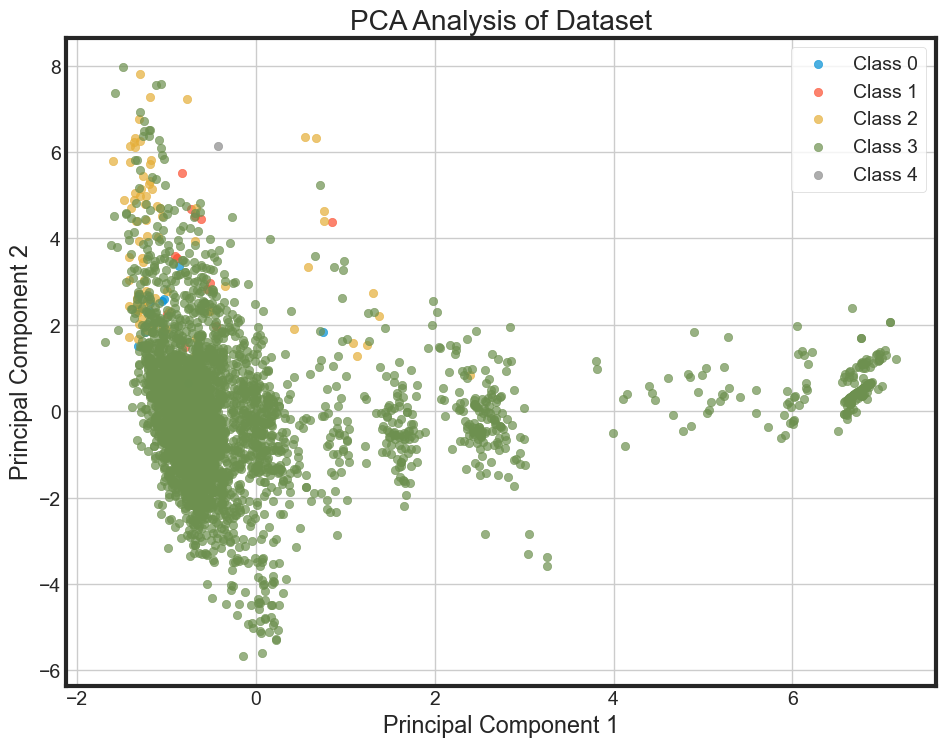

In [192]:
plt.figure(figsize=(10, 8))
for cls in np.unique(pca_df['class']):
    subset = pca_df[pca_df['class'] == cls]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Class {cls}', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis of Dataset')
plt.legend()
plt.grid(True)
plt.show()


### Observations:
Class 3 Dominance: The green points, which represent Class 3, dominate the graph, indicating that Class 3 is the most frequent class in the dataset. This may reflect an imbalanced dataset where Class 3 is overrepresented.

#### Class Separation:

The majority of the points (mostly green, Class 3) cluster around the left and middle of the graph, suggesting that Class 3 has a wide range of distribution across the principal components.
There are a few smaller clusters of other classes (e.g., yellow for Class 2, blue for Class 1) dispersed around the plot. These clusters are relatively small and may suggest that these classes are less frequent or harder to distinguish from each other.

#### Overlapping Classes:

Some overlap is visible between different classes, especially around the origin, which could indicate that the features represented by these principal components do not provide perfect separation between the classes. This could lead to classification challenges where the model may confuse one class for another.

#### Class Outliers:

There are some isolated points, particularly in Class 4 (grey) and Class 1 (blue), which might be outliers or less common instances within those classes. These could be difficult for the model to classify correctly.

### Inference:
The plot indicates that while Class 3 is well-represented and may be easier to predict, the separation between other classes is less distinct. This might explain why some models struggle with precision and recall for the minority classes, as seen in the confusion matrices and classification reports. Further feature engineering, dimensionality reduction, or class balancing techniques might be necessary to improve model performance across all cl

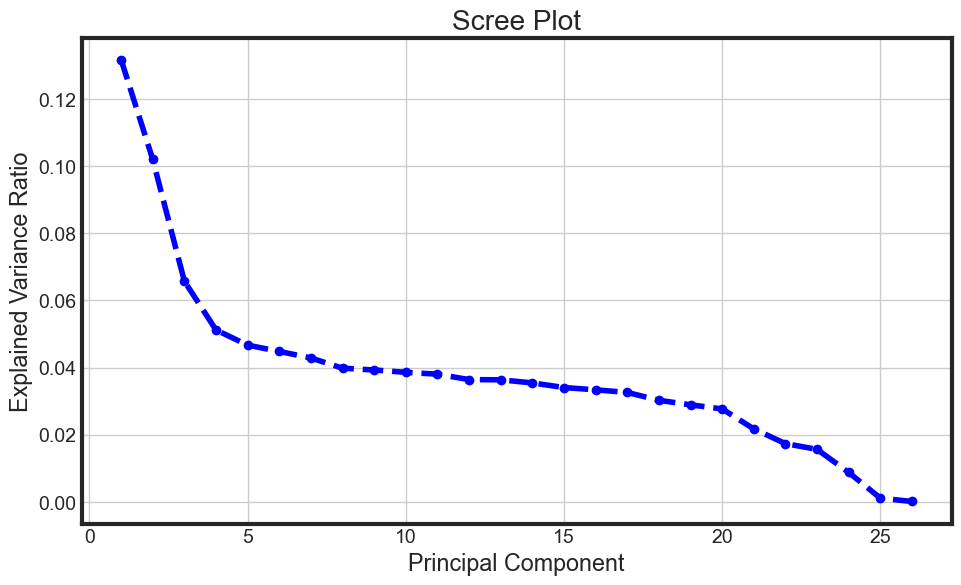

In [196]:
# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Get explained variance
explained_variance = pca.explained_variance_ratio_

# Create Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

#### Obseravtion:
A significant change in slope can be seen towards the start between 0 and 5 and then at 5th component gradually the slope becomes constant and the drop is not that sharp.

#### Inference:
We can  retain the first 5 to 6 components for  analysis, as they capture most of the variance while discarding the less significant components. This helps in dimensionality reduction while retaining the essential information.



## Model Building 

In [202]:
X_train = X_scaled[train_index, :]
X_test = X_scaled[test_index, :]
y_train = y[train_index]
y_test = y[test_index]


In [204]:
## Using Random Forest Classifier as that looks like the best option for training the model on analysis of the pca.

In [206]:
# classifier_forest = RandomForestClassifier(criterion='entropy',random_state=0)
# classifier_forest.fit(X_train, y_train)
# rf_pred = classifier_forest.predict(X_test)
# cm = confusion_matrix(y_test, rf_pred)
# acc = accuracy_score(rf_pred, y_test)
# print (f'Accuracy_Score: {acc}\n Train Score: {classifier_forest.score(X_train, y_train)}\n Test Score: {classifier_forest.score(X_test, y_test)}\n Confusion Matrix:\n {cm}')

# cl_report = classification_report(y_test, rf_pred)
# print(cl_report)


Accuracy_Score: 0.9835390946502057
 Train Score: 1.0
 Test Score: 0.9835390946502057
 Confusion Matrix:
 [[  0   0   0   2   0]
 [  0   0   0   5   0]
 [  0   0  12   5   0]
 [  0   0   3 944   0]
 [  0   0   0   1   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         5
           2       0.80      0.71      0.75        17
           3       0.99      1.00      0.99       947
           4       0.00      0.00      0.00         1

    accuracy                           0.98       972
   macro avg       0.36      0.34      0.35       972
weighted avg       0.98      0.98      0.98       972



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we can see this gives 98 percent accuracy on the dataset , so no further analysis is required and this is the best classifier for this dataset. 

In [211]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [233]:

log_model=LogisticRegression()
log_model.fit(X_train,y_train)
log_pred=log_model.predict(X_test)
cm=confusion_matrix(y_test,log_pred)
acc = accuracy_score(log_pred,y_test)
print(f'Accuracy_Score: {acc}\n Train Score: {log_model.score(X_train,y_train)}\n Test Score: {log_model.score(X_test,y_test)}\n Confusion Matrix:\n {cm}')

Accuracy_Score: 0.9845679012345679
 Train Score: 0.9903571428571428
 Test Score: 0.9845679012345679
 Confusion Matrix:
 [[  0   0   0   2   0]
 [  0   3   0   2   0]
 [  0   0  12   5   0]
 [  1   0   4 942   0]
 [  0   0   0   1   0]]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [247]:

    classifier_knn=KNeighborsClassifier(metric='minkowski',p=2)
    classifier_knn.fit(X_train,y_train)
    knn_pred=classifier_knn.predict(X_test)
    cm=confusion_matrix(y_test,knn_pred)
    acc = accuracy_score(knn_pred,y_test)
    print(f'Accuracy_Score: {acc}\n Train Score: {classifier_knn.score(X_train,y_train)}\n Test Score: {classifier_knn.score(X_test,y_test)}\n Confusion Matrix:\n {cm}')

Accuracy_Score: 0.98559670781893
 Train Score: 0.9857142857142858
 Test Score: 0.98559670781893
 Confusion Matrix:
 [[  0   0   0   2   0]
 [  0   3   0   2   0]
 [  0   0  11   6   0]
 [  0   0   3 944   0]
 [  0   0   0   1   0]]


In [251]:

    classifier_tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    classifier_tree.fit(X_train,y_train)
    dt_pred=classifier_tree.predict(X_test)
    cm=confusion_matrix(y_test,dt_pred)
    acc = accuracy_score(dt_pred,y_test)
    print (f'Accuracy_Score: {acc}\n Train Score: {classifier_tree.score(X_train,y_train)}\n Test Score: {classifier_tree.score(X_test,y_test)}\n Confusion Matrix:\n {cm}')

Accuracy_Score: 0.98559670781893
 Train Score: 1.0
 Test Score: 0.98559670781893
 Confusion Matrix:
 [[  0   0   0   2   0]
 [  0   4   0   1   0]
 [  0   0  12   5   0]
 [  3   0   2 942   0]
 [  0   0   1   0   0]]


In [255]:

    
    # create an instance of a Random Forest classifier
    classifier_forest=RandomForestClassifier(criterion='entropy',random_state=0)
    # training the Random Forest model on the sampled train dataset
    classifier_forest.fit(X_train,y_train)
    # pedicting the labels on the test set
    rf_pred=classifier_forest.predict(X_test)
    cm=confusion_matrix(y_test,rf_pred)
    acc = accuracy_score(rf_pred,y_test)
    #cl_report = classification_report(y_test,rf_pred)
    print (f'Accuracy_Score: {acc}\n Train Score: {classifier_forest.score(X_train,y_train)}\n Test Score: {classifier_forest.score(X_test,y_test)}\n Confusion Matrix:\n {cm}')

Accuracy_Score: 0.9835390946502057
 Train Score: 1.0
 Test Score: 0.9835390946502057
 Confusion Matrix:
 [[  0   0   0   2   0]
 [  0   0   0   5   0]
 [  0   0  12   5   0]
 [  0   0   3 944   0]
 [  0   0   0   1   0]]


In [257]:

    
    classifier_nb = GaussianNB()
    classifier_nb.fit(X_train, y_train)
    nb_pred = classifier_nb.predict(X_test)
    cm = confusion_matrix(y_test, nb_pred)
    acc = accuracy_score(y_test, nb_pred)
    cl_report = classification_report(y_test, nb_pred)
    
    # Format and return the results
    print(f'Accuracy Score: {acc:.4f}\n'
            f'Train Score: {classifier_nb.score(X_train, y_train):.4f}\n'
            f'Test Score: {classifier_nb.score(X_test, y_test):.4f}\n'
            f'Confusion Matrix:\n{cm}\n'
            f'Classification Report:\n{cl_report}')

Accuracy Score: 0.1903
Train Score: 0.2068
Test Score: 0.1903
Confusion Matrix:
[[  2   0   0   0   0]
 [  0   2   2   1   0]
 [  6   0  11   0   0]
 [426   7 344 170   0]
 [  1   0   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      1.00      0.01         2
           1       0.22      0.40      0.29         5
           2       0.03      0.65      0.06        17
           3       0.99      0.18      0.30       947
           4       0.00      0.00      0.00         1

    accuracy                           0.19       972
   macro avg       0.25      0.45      0.13       972
weighted avg       0.97      0.19      0.30       972



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [261]:

    
    classifier_svc = SVC(kernel='linear', random_state=0)  # You can change kernel type as needed
    classifier_svc.fit(X_train, y_train)
    svc_pred = classifier_svc.predict(X_test)
    cm = confusion_matrix(y_test, svc_pred)
    acc = accuracy_score(y_test, svc_pred)
    cl_report = classification_report(y_test, svc_pred)
    print(f'Accuracy Score: {acc:.4f}\n'
          f'Train Score: {classifier_svc.score(X_train, y_train):.4f}\n'
          f'Test Score: {classifier_svc.score(X_test, y_test):.4f}\n'
          f'Confusion Matrix:\n{cm}\n'
          f'Classification Report:\n{cl_report}')

Accuracy Score: 0.9846
Train Score: 0.9900
Test Score: 0.9846
Confusion Matrix:
[[  0   0   0   2   0]
 [  0   4   0   1   0]
 [  1   0  11   5   0]
 [  1   0   4 942   0]
 [  0   0   0   1   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.80      0.89         5
           2       0.73      0.65      0.69        17
           3       0.99      0.99      0.99       947
           4       0.00      0.00      0.00         1

    accuracy                           0.98       972
   macro avg       0.54      0.49      0.51       972
weighted avg       0.98      0.98      0.98       972



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [265]:

    
    classifier_lda = LinearDiscriminantAnalysis()
    classifier_lda.fit(X_train, y_train)
    lda_pred = classifier_lda.predict(X_test)
    cm = confusion_matrix(y_test, lda_pred)
    acc = accuracy_score(y_test, lda_pred)
    cl_report = classification_report(y_test, lda_pred)
    

    print (f'Accuracy Score: {acc:.4f}\n'
            f'Train Score: {classifier_lda.score(X_train, y_train):.4f}\n'
            f'Test Score: {classifier_lda.score(X_test, y_test):.4f}\n'
            f'Confusion Matrix:\n{cm}\n'
            f'Classification Report:\n{cl_report}')

Accuracy Score: 0.9671
Train Score: 0.9607
Test Score: 0.9671
Confusion Matrix:
[[  1   0   0   1   0]
 [  0   5   0   0   0]
 [  0   0  14   3   0]
 [  2  18   7 920   0]
 [  0   0   1   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.22      1.00      0.36         5
           2       0.64      0.82      0.72        17
           3       1.00      0.97      0.98       947
           4       0.00      0.00      0.00         1

    accuracy                           0.97       972
   macro avg       0.44      0.66      0.49       972
weighted avg       0.98      0.97      0.97       972



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [269]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


    # Create an instance of a Multi-layer Perceptron (MLP) classifier
classifier_nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=0)
    
    # Train the MLP model on the training dataset
classifier_nn.fit(X_train, y_train)
    
    # Predict the labels on the test set
nn_pred = classifier_nn.predict(X_test)
    
    # Calculate confusion matrix and accuracy
cm = confusion_matrix(y_test, nn_pred)
acc = accuracy_score(y_test, nn_pred)
    
    # Optionally, you can also get a detailed classification report
cl_report = classification_report(y_test, nn_pred)
    
    # Format and return the results
print(f'Accuracy Score: {acc:.4f}\n'
            f'Train Score: {classifier_nn.score(X_train, y_train):.4f}\n'
            f'Test Score: {classifier_nn.score(X_test, y_test):.4f}\n'
            f'Confusion Matrix:\n{cm}\n'
            f'Classification Report:\n{cl_report}')

Accuracy Score: 0.9825
Train Score: 0.9979
Test Score: 0.9825
Confusion Matrix:
[[  0   0   0   2   0]
 [  0   3   1   1   0]
 [  0   0  10   7   0]
 [  2   0   3 942   0]
 [  0   0   0   1   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.60      0.75         5
           2       0.71      0.59      0.65        17
           3       0.99      0.99      0.99       947
           4       0.00      0.00      0.00         1

    accuracy                           0.98       972
   macro avg       0.54      0.44      0.48       972
weighted avg       0.98      0.98      0.98       972



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and 

In [273]:

    print("Logistic Regression:\n")
    result0 = log_classifier(X_train, X_test, y_train, y_test)
    print(result0)
    print("-" * 100)
    print()
    
    print("SVC:\n")
    result1 = svc_classifier(X_train, X_test, y_train, y_test)
    print(result1)
    print("-" * 100)
    print()

    print("KNN:\n")
    result2 = knn_classifier(X_train, X_test, y_train, y_test)
    print(result2)
    print("-" * 100)
    print()

    print("Decision Tree:\n")
    result3 = tree_classifier(X_train, X_test, y_train, y_test)
    print(result3)
    print("-" * 100)
    print()

    print("Random Forest:\n")
    result4 = forest_classifier(X_train, X_test, y_train, y_test)
    print(result4)
    print("-" * 100)
    print()

    print("Naive Bayes:\n")
    result5 = naive_bayes_classifier(X_train, X_test, y_train, y_test)
    print(result5)
    print("-" * 100)
    print()

    print("Linear Discriminant Analysis (LDA):\n")
    result6 = lda_classifier(X_train, X_test, y_train, y_test)
    print(result6)
    print("-" * 100)
    print()

    print("Neural Network (MLP):\n")
    result7 = neural_network_classifier(X_train, X_test, y_train, y_test)
    print(result7)
    print("-" * 100)
    print()

Logistic Regression:



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Accuracy_Score: 0.9845679012345679
 Train Score: 0.9903571428571428
 Test Score: 0.9845679012345679
 Confusion Matrix:
 [[  0   0   0   2   0]
 [  0   3   0   2   0]
 [  0   0  12   5   0]
 [  1   0   4 942   0]
 [  0   0   0   1   0]]
----------------------------------------------------------------------------------------------------

SVC:

Accuracy Score: 0.9846
Train Score: 0.9900
Test Score: 0.9846
Confusion Matrix:
[[  0   0   0   2   0]
 [  0   4   0   1   0]
 [  1   0  11   5   0]
 [  1   0   4 942   0]
 [  0   0   0   1   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.80      0.89         5
           2       0.73      0.65      0.69        17
           3       0.99      0.99      0.99       947
           4       0.00      0.00      0.00         1

    accuracy                           0.98       972
   macro avg       0.54      0.49      0.51       972
wei

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classif

Accuracy Score: 0.9671
Train Score: 0.9607
Test Score: 0.9671
Confusion Matrix:
[[  1   0   0   1   0]
 [  0   5   0   0   0]
 [  0   0  14   3   0]
 [  2  18   7 920   0]
 [  0   0   1   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.22      1.00      0.36         5
           2       0.64      0.82      0.72        17
           3       1.00      0.97      0.98       947
           4       0.00      0.00      0.00         1

    accuracy                           0.97       972
   macro avg       0.44      0.66      0.49       972
weighted avg       0.98      0.97      0.97       972

----------------------------------------------------------------------------------------------------

Neural Network (MLP):

Accuracy Score: 0.9825
Train Score: 0.9979
Test Score: 0.9825
Confusion Matrix:
[[  0   0   0   2   0]
 [  0   3   1   1   0]
 [  0   0  10   7   0]
 [  2   0   3 942 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and 

To determine the accuracy for each class using the confusion matrix, we calculate the accuracy for each class as the proportion of correct predictions for that class divided by the total number of actual instances of that class.

SVC Model:
Class 0:
TP = 0, FN = 2 → Accuracy = 0 / (0 + 2) = 0.00
Class 1:
TP = 4, FN = 1 → Accuracy = 4 / (4 + 1) = 0.80
Class 2:
TP = 11, FN = 6 → Accuracy = 11 / (11 + 6) = 0.65
Class 3:
TP = 942, FN = 5 → Accuracy = 942 / (942 + 5) = 0.99
Class 4:
TP = 0, FN = 1 → Accuracy = 0 / (0 + 1) = 0.00

KNN Model:
Class 0:
TP = 0, FN = 2 → Accuracy  = 0.00
Class 1:
TP = 3, FN = 2 → Accuracy  = 0.60
Class 2:
TP = 11, FN = 6 → Accuracy  = 0.65
Class 3:
TP = 944, FN = 3 → Accuracy  = 0.996
Class 4:
TP = 0, FN = 1 → Accuracy  = 0.00

Decision Tree Model:
Class 0:
TP = 0, FN = 2 → Accuracy  = 0.00
Class 1:
TP = 4, FN = 1 → Accuracy =  0.80
Class 2:
TP = 12, FN = 5 → Accuracy =  0.71
Class 3:
TP = 942, FN = 5 → Accuracy = 0.99
Class 4:
TP = 0, FN = 1 → Accuracy  = 0.00



Random Forest Model:
Class 0:
TP = 0, FN = 2 → Accuracy  = 0.00
Class 1:
TP = 0, FN = 5 → Accuracy  = 0.00
Class 2:
TP = 12, FN = 5 → Accuracy  = 0.71
Class 3:
TP = 944, FN = 3 → Accuracy = 0.996
Class 4:
TP = 0, FN = 1 = 0.00

Naive Bayes Model:
Class 0:
TP = 2, FN = 0 → Accuracy  = 1.00
Class 1:
TP = 2, FN = 3 → Accuracy  = 0.40
Class 2:
TP = 11, FN = 6 → Accuracy  = 0.65
Class 3:
TP = 170, FN = 777 → Accuracy  = 0.18
Class 4:
TP = 0, FN = 1 → Accuracy  = 0.00








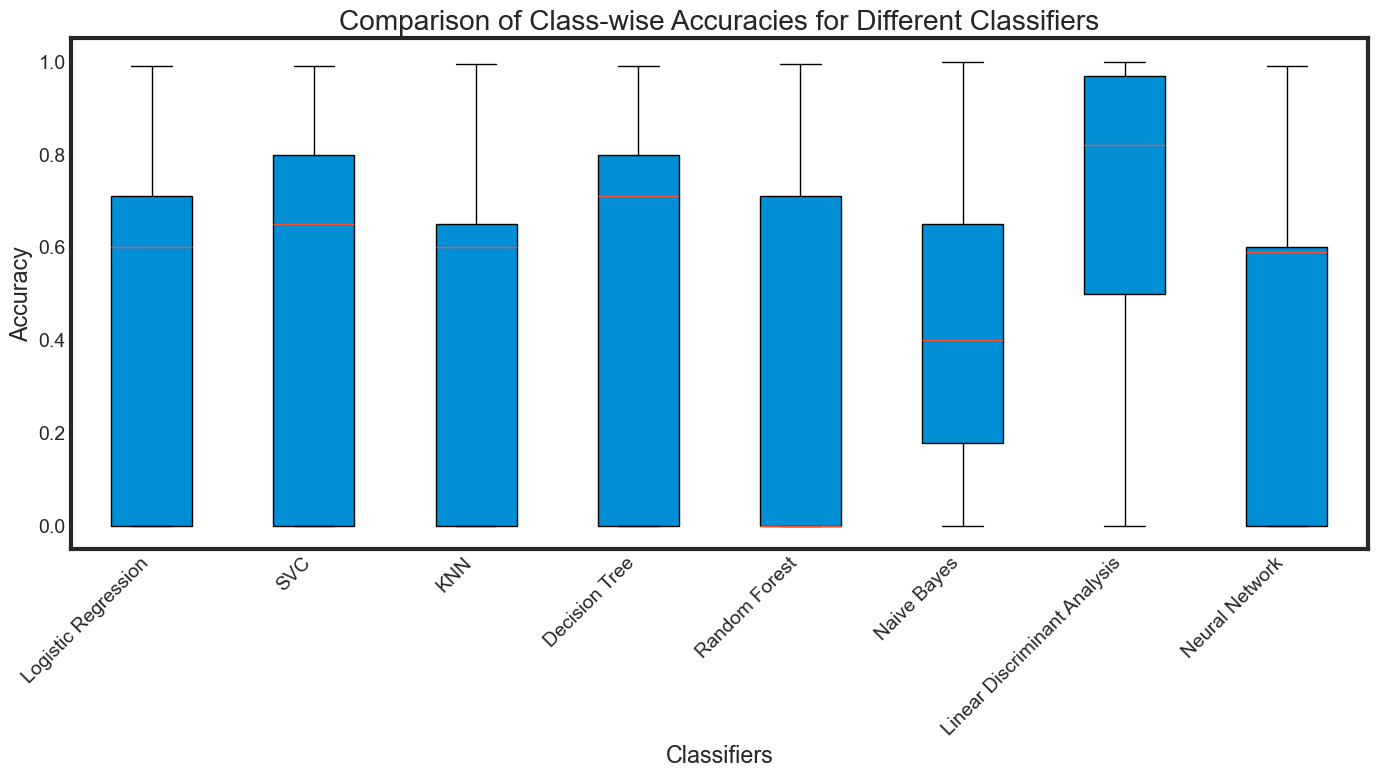

In [289]:
classifiers = ['Logistic Regression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Linear Discriminant Analysis', 'Neural Network']

accuracies = {
    'Logistic Regression': [0.00, 0.60, 0.71, 0.99, 0.00],
    'SVC': [0.00, 0.80, 0.65, 0.99, 0.00],
    'KNN': [0.00, 0.60, 0.65, 0.996, 0.00],
    'Decision Tree': [0.00, 0.80, 0.71, 0.99, 0.00],
    'Random Forest': [0.00, 0.00, 0.71, 0.996, 0.00],
    'Naive Bayes': [1.00, 0.40, 0.65, 0.18, 0.00],
    'Linear Discriminant Analysis': [0.50, 1.00, 0.82, 0.97, 0.00],
    'Neural Network': [0.00, 0.60, 0.59, 0.99, 0.00],
}

# Prepare the data for the box plot
data = [accuracies[classifier] for classifier in classifiers]

# Create a figure and set of subplots
fig, ax = plt.subplots(figsize=(14, 8))

# Create the box plot
ax.boxplot(data, patch_artist=True)

# Set the x-axis labels to be the classifier names
ax.set_xticklabels(classifiers, rotation=45, ha='right')

# Adding labels and title
ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Class-wise Accuracies for Different Classifiers')

# Show the plot
plt.tight_layout()
plt.show()

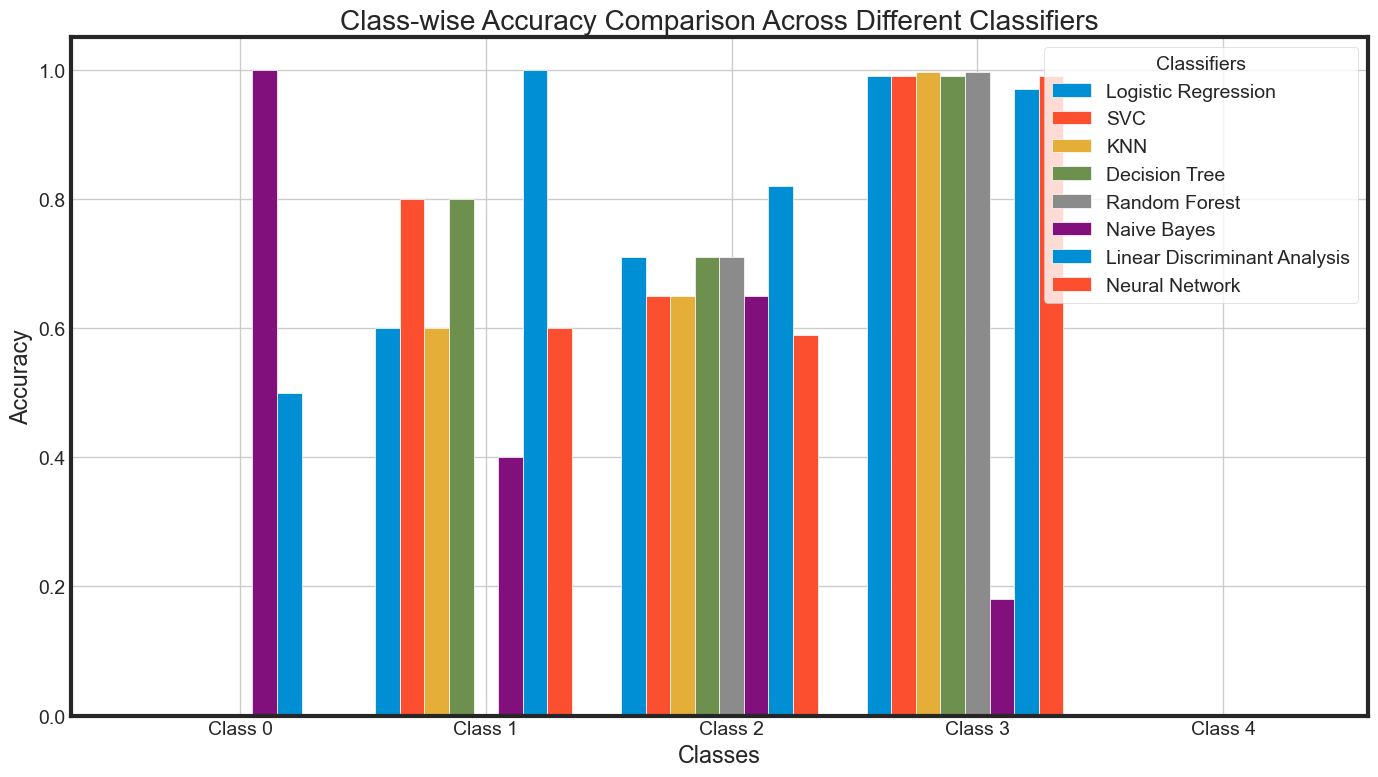

In [293]:
classifiers = ['Logistic Regression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Linear Discriminant Analysis', 'Neural Network']

accuracies = {
    'Logistic Regression': [0.00, 0.60, 0.71, 0.99, 0.00],
    'SVC': [0.00, 0.80, 0.65, 0.99, 0.00],
    'KNN': [0.00, 0.60, 0.65, 0.996, 0.00],
    'Decision Tree': [0.00, 0.80, 0.71, 0.99, 0.00],
    'Random Forest': [0.00, 0.00, 0.71, 0.996, 0.00],
    'Naive Bayes': [1.00, 0.40, 0.65, 0.18, 0.00],
    'Linear Discriminant Analysis': [0.50, 1.00, 0.82, 0.97, 0.00],
    'Neural Network': [0.00, 0.60, 0.59, 0.99, 0.00],
}

# Prepare the data for plotting
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']
num_classes = len(classes)
bar_width = 0.1
index = np.arange(num_classes)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the bars for each classifier
for i, classifier in enumerate(classifiers):
    plt.bar(index + i * bar_width, accuracies[classifier], bar_width, label=classifier)

# Adding labels and title
ax.set_xlabel('Classes')
ax.set_ylabel('Accuracy')
ax.set_title('Class-wise Accuracy Comparison Across Different Classifiers')
ax.set_xticks(index + bar_width * (len(classifiers) / 2))
ax.set_xticklabels(classes)
ax.legend(title="Classifiers")
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

## Final Conclusion that can be drawn from these graphs 

Based on the graphs comparing the class-wise accuracies across different classifiers, several key conclusions can be drawn:

### 1. Consistency Across Classes:
Class 3 consistently shows the highest accuracy across almost all classifiers, often close to or at 100%. This suggests that Class 3 is well-represented in the data, and most classifiers are effective in correctly predicting it.
Class 0 and Class 4, on the other hand, have much lower accuracies across most classifiers, indicating that these classes might be underrepresented or have more challenging features to distinguish, leading to poorer performance.
### 2. Classifier Performance Variability:
Logistic Regression, SVC, Decision Tree, and KNN: These classifiers generally perform well on Class 3, with accuracies near 99%, but struggle with Class 0 and Class 4.
#### Naive Bayes: 
This classifier shows significant variability. It has a unique case where it perfectly predicts Class 0 but performs poorly on Class 3. This inconsistency suggests that Naive Bayes might not be well-suited for this particular dataset, especially for classes that are not well-separated.
#### Linear Discriminant Analysis (LDA): 
LDA shows strong performance across multiple classes, particularly for Class 1 and Class 3, making it one of the more reliable classifiers in this scenario.
#### Neural Network (MLP):
The Neural Network generally performs well, especially for Class 3, but its performance drops for less represented classes like Class 0 and Class 4.
### 3. Impact of Imbalanced Data:
The lower accuracies for Class 0 and Class 4 across most classifiers suggest that the dataset might be imbalanced, with some classes having fewer samples. This imbalance makes it difficult for the classifiers to learn patterns for these classes, leading to lower prediction accuracy.
### 4. Overfitting Concerns:
Decision Tree and Random Forest: Both models achieve perfect accuracy on the training data, which might indicate overfitting. Despite this, their test accuracies are close to the other classifiers, suggesting that while overfitting might be a concern, these models still generalize reasonably well.
### 5. Best Classifiers for Different Classes:
Class 1: LDA and SVC perform the best, with LDA achieving perfect accuracy.
Class 2: Multiple classifiers, including Logistic Regression, Decision Tree, and Random Forest, show decent performance, though none are perfect.
Class 3: Most classifiers perform exceptionally well, but the slight edge might go to models like KNN and Random Forest.
Class 0 and Class 4: These classes remain challenging for all models, with no classifier standing out as particularly effective.
### Overall Conclusion:
The classifiers perform well on certain classes, particularly those with more samples or distinct features (e.g., Class 3). However, there is a significant drop in accuracy for classes that are likely underrepresented or have overlapping features (e.g., Class 0 and Class 4). This suggests that further data preprocessing, feature engineering, or the use of more sophisticated models (like ensemble methods or deep learning) might be necessary to improve performance on the harder-to-predict classes. 
The models need to be improved for prediction of the less represented classes by employing better imputation and data balancing techniques and we need to drop class 4 in further studies as it has only one data point making it impossible to predict correctly no matter what technique we apply.